<a href="https://colab.research.google.com/github/DheerajKumar123987/Data-Science-Assignment4-Q2/blob/main/DataScience_Assign4(Q2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING** **LIABRARIES**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## **1.LOADING** **DATASET**



In [23]:
df = pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## **2.Performing EDA and Plotting Data**

**CHECKING DATATYPE**

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**CHECKING FOR NULL AND DUPLICATE VALUES**

In [12]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
df[df.duplicated()]

,YearsExperience,Salary


## **3.Plotting the data to check for outliers**

<ipython-input-44-dc76d26eeb60>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


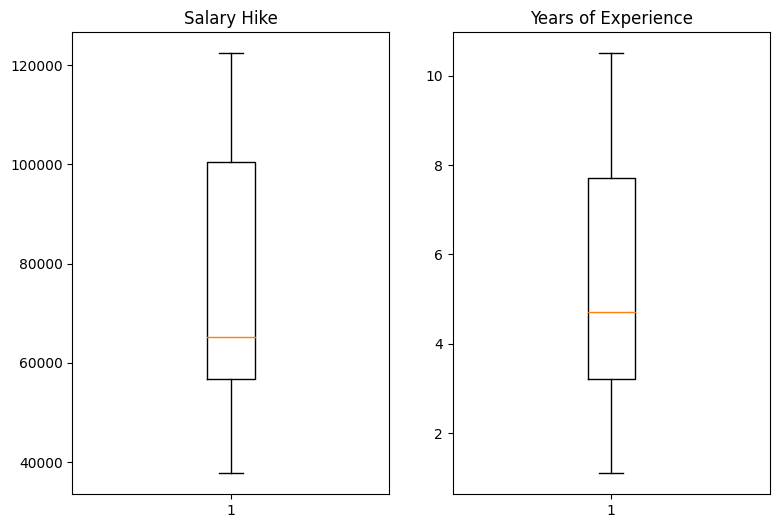

In [44]:
plt.subplots(figsize = (9,6))
plt.subplot(1,2,1)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

**FROM THE ABOVE BOX PLOT, WE CAN CONFIRM THAT THERE ARE NO OUTLIERS**

## **4.Checking the Correlation between variables**

In [17]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Visualization of Correlation beteen x and y** **using Regression Plot**

<Axes: xlabel='YearsExperience', ylabel='Salary'>

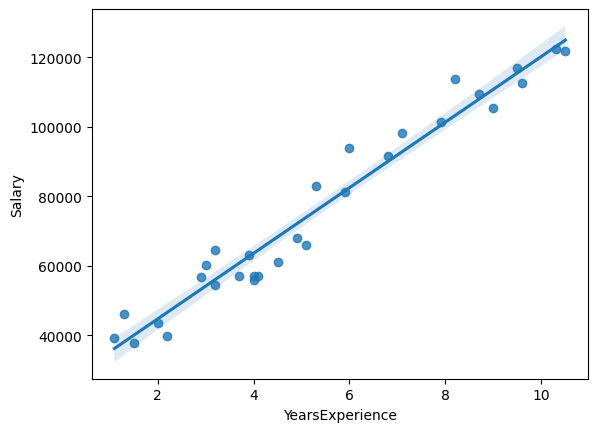

In [18]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])  


From the above reg plot, we can see that

*   There is good correlation between the two variables
*   The score is more than 0.8 which is a good sign

## **5.Checking for Homoscedasticity or Heteroscedasticity**

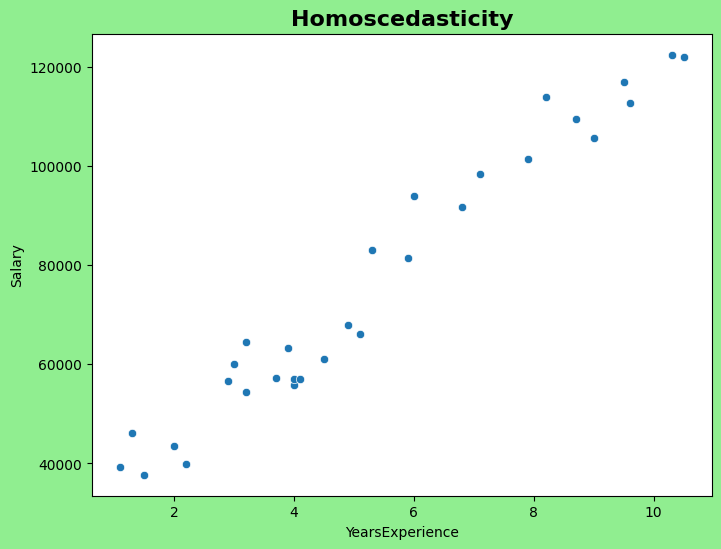

In [19]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

As you can see in above graph

1. It shows as the Years of Experience increases,salary increases and the   variation is constant along the way in data
2. The data doesn't have any specific pattern in the variation. hence, we can say it follows Homoscedasticity. Hence, square, cube root transformations are not required.







## **6.Feature Engineering**
***Trying different transformation of data to estimate normal distribution and remove any skewness**

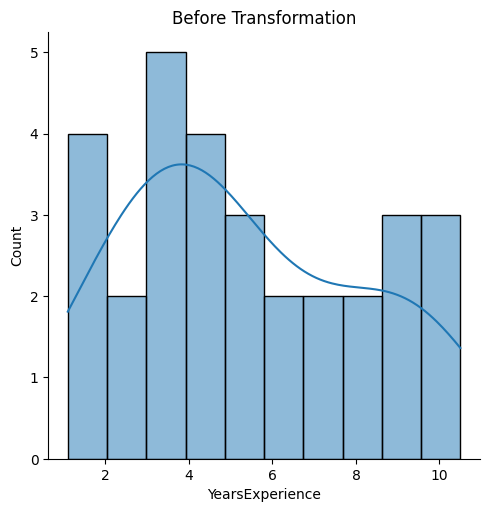

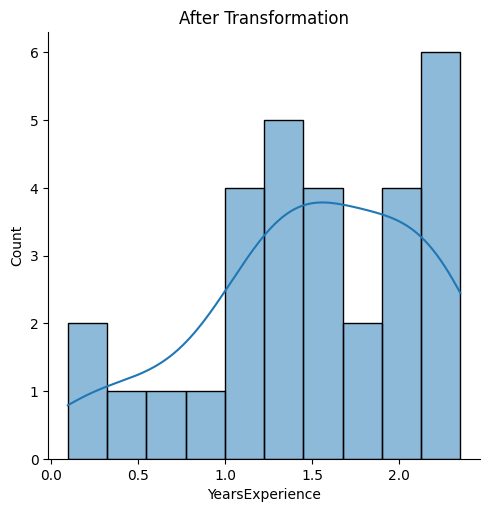

In [45]:
sns.displot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

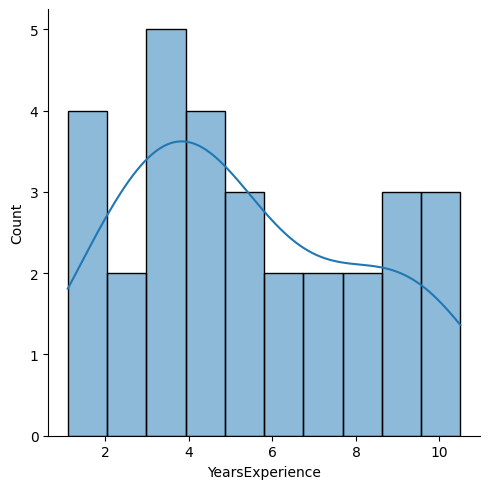

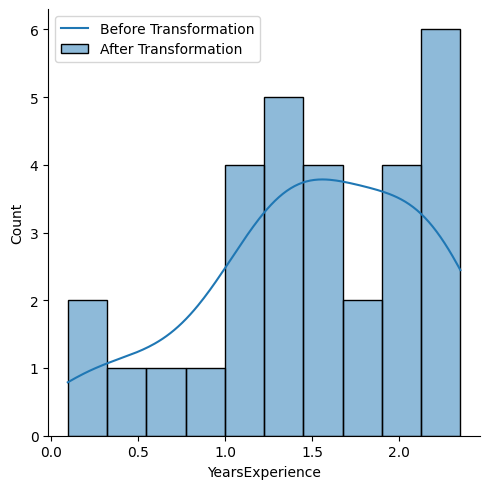

In [22]:
labels = ['Before Transformation','After Transformation']
sns.displot(df['YearsExperience'], bins = 10, kde = True)
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

As we can see

1.How log transformation affects the data and it scales the values down.

2.Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

## **7. Splitting Variables and Model Fitting**

In [25]:
X= df[['YearsExperience']]
Y= df['Salary']

**Model Fitting**

In [26]:
LR=LinearRegression()
LR.fit(X,Y)

LinearRegression()

**Finding Coefficient Parameters (m and c values)**

In [32]:
LR.coef_             #Coefficient/Slope(m)


array([9449.96232146])

In [31]:
LR.intercept_        #Bias/Constant(c)

25792.200198668696

## **8. Predict the values**

In [34]:
Y_pred = LR.predict(X)
Y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

## **9.METRICS**

In [36]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y,Y_pred)
print("Mean Squared Error =", MSE.round(2))

RMSE = np.sqrt(MSE)
print("Root Mean Squared Error =", RMSE.round(2))

Mean Squared Error = 31270951.72
Root Mean Squared Error = 5592.04


**As model has the minimum RMSE and highest Adjusted R-squared score, we can use model to predict our values**

## **EDA for Predicted Data**

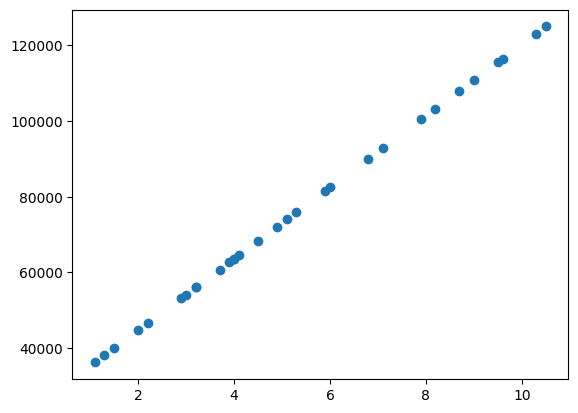

In [46]:
import matplotlib.pyplot as plt
plt.scatter(X,Y_pred)                  #scatterplot
plt.show()

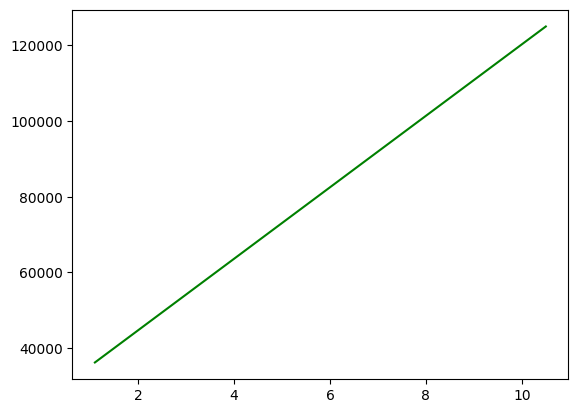

In [47]:
plt.plot(X,Y_pred,color='green')       #lineplot
plt.show()

## **MODEL PREDICTIONS**

In [38]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [39]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [41]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred
LR.predict(data_pred)

array([54142.08716303, 73042.01180594])